In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

### with complex numbers of python and np.linspace

In [28]:
def calc_mand3(resolution, precision):
    rl = np.outer(np.ones((resolution,)), np.linspace(-2, 2, resolution))
    im = np.outer(1j*np.linspace(2, -2, resolution), np.ones((resolution,)))
    x =  rl + im

    y = np.zeros((np.shape(x)[0], np.shape(x)[1]))

    for row in range(np.shape(x)[0]):
        for col in range(np.shape(x)[1]):
            firstZ = x[row, col]
            for i in range(precision):
                x[row, col] = x[row, col] ** 2 + firstZ
                if x[row, col].real * x[row, col].real + x[row, col].imag * x[row, col].imag > 4:
                    break
            if 40 > i > 15:
                y[col,row] = 50
            else:
                y[col,row] = 0
    return y

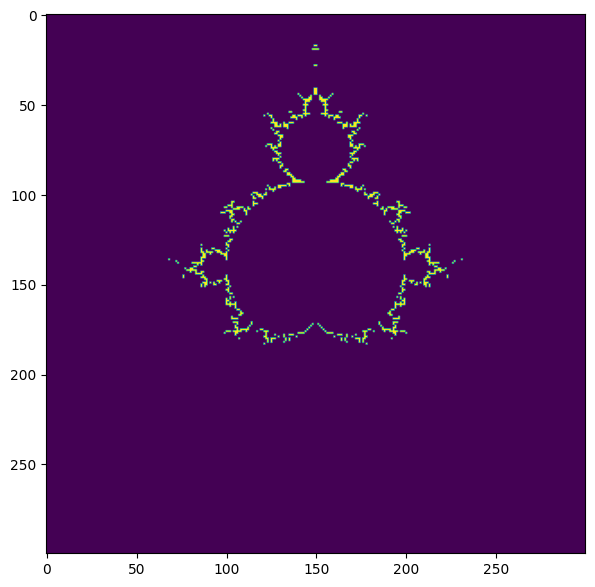

In [29]:
resolution = 300

rl = np.outer(np.ones((resolution,)), np.linspace(-2, 2, resolution))
im = np.outer(1j*np.linspace(2, -2, resolution), np.ones((resolution,)))
compl_plane =  rl + im

mb_py = calc_mand3(resolution, 50)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(mb_py)
plt.show()

In [23]:
import julia

In [56]:
def mover(x, y):
    around = np.array([mb_py[x-1, y], mb_py[x-1, y+1], mb_py[x, y+1], mb_py[x+1, y+1], \
                                                       mb_py[x+1, y], mb_py[x+1, y-1]])#, mb_py[x, y-1], mb_py[x-1, y-1], ])
    max_around = (np.max(around))
    print(around)
    
    cells = {0: [x-1, y], 1: [x-1, y+1], 2: [x, y+1], 3:[ x+1, y+1], 4: [x+1, y], 5: [x+1, y-1]}
    
    for i in enumerate(around):
        print(i[1])#, mb_py[cells[i[0]]])
#         if i == max_around:
#             jl = julia.calc_julia(resolution, compl_plane[round(resolution/2), x])
            
#             fig, ax = plt.subplots()
#             fig.set_size_inches(14.4, 14.4)
#             fig.patch.set_visible(False)
#             ax.axis('off')
#             fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#             ax.imshow(jl, cmap='flag')

#             plt.savefig('C:\\Users\\ksn\\temp/{}_{}.png'.format(np.where(mb_py == i)[0][0], np.where(mb_py == i)[1][0]))
#             plt.clf()
            
#             print(np.where(mb_py == i)[0][0], np.where(mb_py == i)[1][0])
#             mover(np.where(mb_py == i)[0][0], np.where(mb_py == i)[1][0])

In [57]:
for y in range(len(mb_py[round(resolution/2), :])):
    if mb_py[round(resolution/2), y] != 0:
        x = round(resolution/2)
        jl = julia.calc_julia(resolution, compl_plane[round(resolution/2), x])
#         plt.subplots()[0].set_size_inches(7, 7)
#         plt.imshow(jl)
#         plt.show()
        mover(x, y)
        break
                

[ 0. 50.  0.  0. 50.  0.]
0.0
50.0
0.0
0.0
50.0
0.0


In [ ]:
def calc_julia(c, z_max=4.0, n_max=1000):
    resolution = 500

    rl = np.outer(np.linspace(-2, 2, resolution), np.ones((resolution,)))
    im = np.outer(1j*np.linspace(2, -2, resolution), np.ones((resolution,)))
    x =  rl.T + im

    y = np.zeros((np.shape(x)[0], np.shape(x)[1]))

    for row in range(np.shape(x)[0]):
        for col in range(np.shape(x)[1]):
            z = x[row, col]
            k = 0
            while z.real * z.real + z.imag * z.imag < (z_max * z_max) and k < n_max:
                z = z ** 2 + c
                k += 1
                
            y[row, col] = k

    return y

In [ ]:
t1 = time.time()
jl = calc_julia(0.279155 + 0.01j)
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(jl)
plt.show()

### cython source of mandelbrot2:
https://github.com/ksn38/cython_examples/blob/main/Mandelbrot_set/mandelbrot2/mandelbrot2.pyx

In [ ]:
import mandelbrot2
print(dir(mandelbrot2))

In [ ]:
import mandelbrot2

t1 = time.time()
#mandelbrot2.calc_mand(resolution, precision, scale, x, y, exponent)
mb = mandelbrot2.calc_mand(1440, 50, 5, -0.5, 0, 1.7)
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow((mb), cmap='flag')

In [ ]:
#exponent changes
def plot1(i, ii):
    jl = mb = mandelbrot2.calc_mand(1440, 50, 5, -0.5, 0, i/100)

    fig, ax = plt.subplots()
    fig.set_size_inches(14.4, 14.4)
    fig.patch.set_visible(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        
    ax.imshow(jl, cmap='flag')

    plt.savefig('C:\\Users\\ksn\\temp/{:04d}.png'.format(ii))
    plt.clf()